In [419]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **EDA**

In [420]:
df = pd.read_csv('/content/EastWestAirlines.csv')

In [421]:
df.shape

(3999, 12)

In [422]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [423]:
df.drop(columns = ['ID#'], inplace= True)

In [424]:
df.isna().sum() # There is no missing values

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [426]:
df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [427]:
df.duplicated().sum()

np.int64(1)

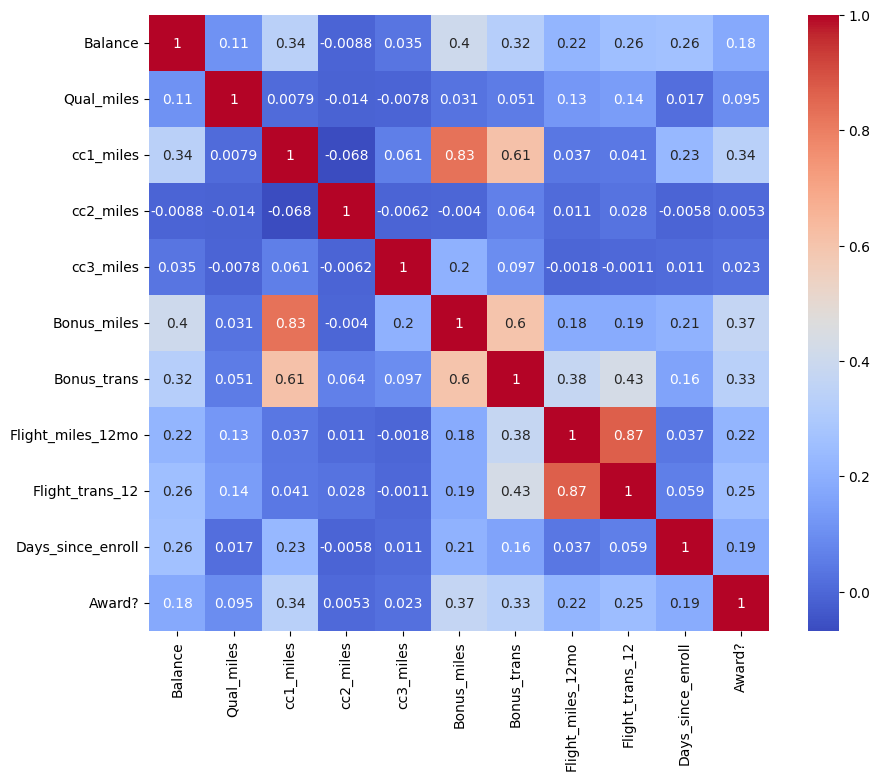

In [428]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

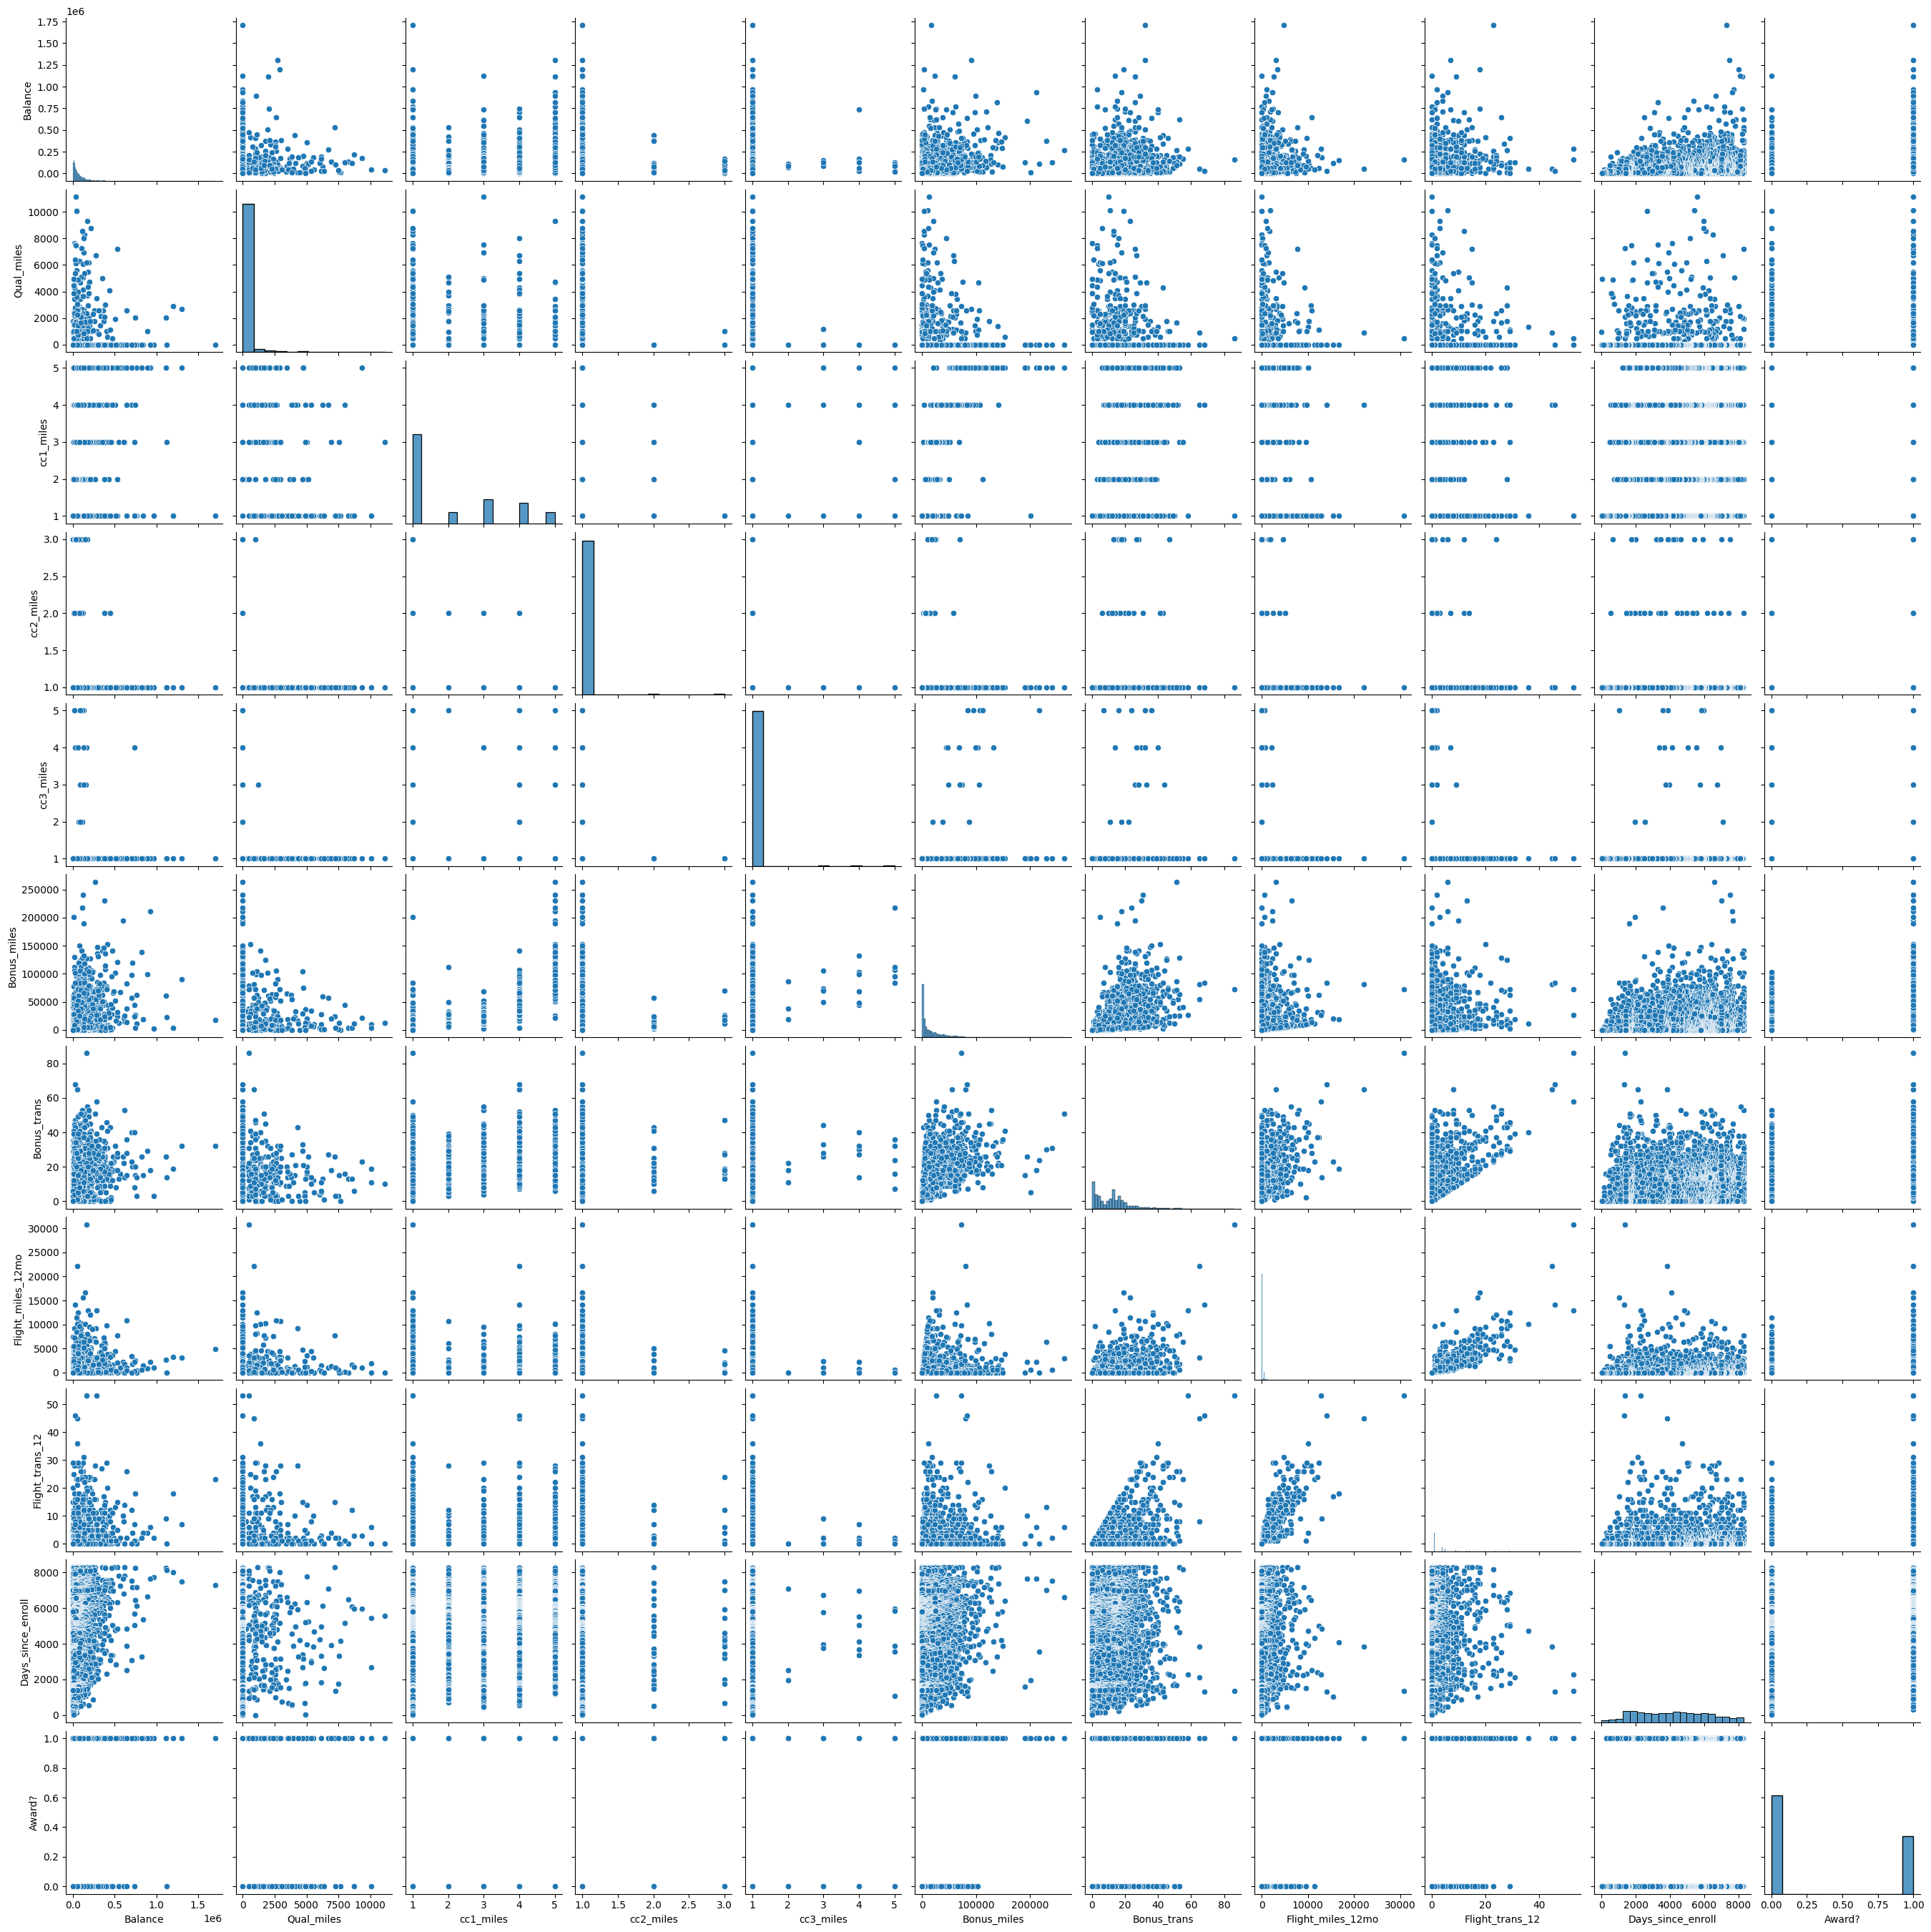

In [429]:
sns.pairplot(df)

In [430]:
#Normalization of Data
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
df1_norm = norm.fit_transform(df)

In [431]:
df1_norm

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

In [432]:
df2 = pd.DataFrame(df1_norm,columns = df.columns)

In [433]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


# **Hierarchical Clustering**

In [434]:
import scipy.cluster.hierarchy as sch # For Dendrogram
from sklearn.cluster import AgglomerativeClustering # Model Building

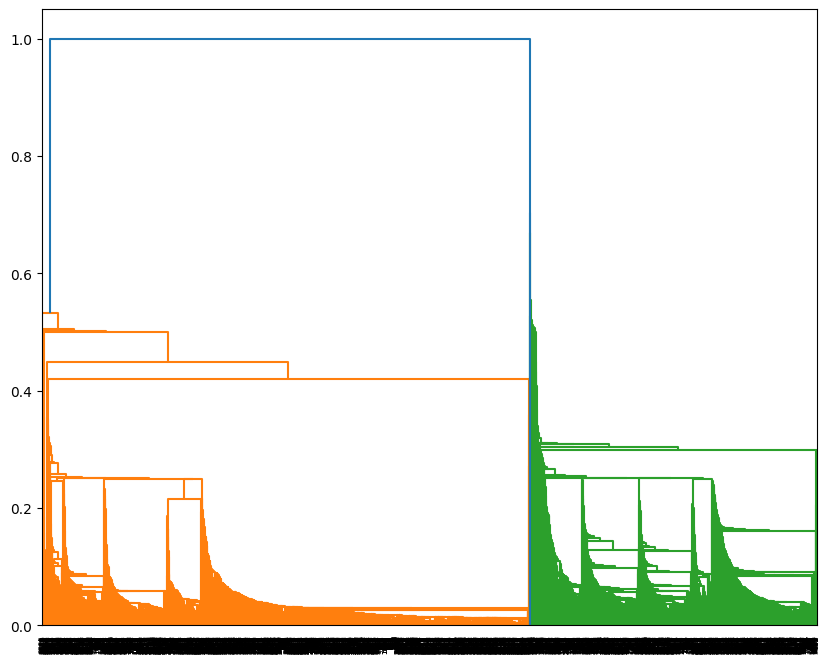

In [435]:
plt.figure(figsize=(10, 8))
dendrogram_single = sch.dendrogram(sch.linkage(df2,method='single'))


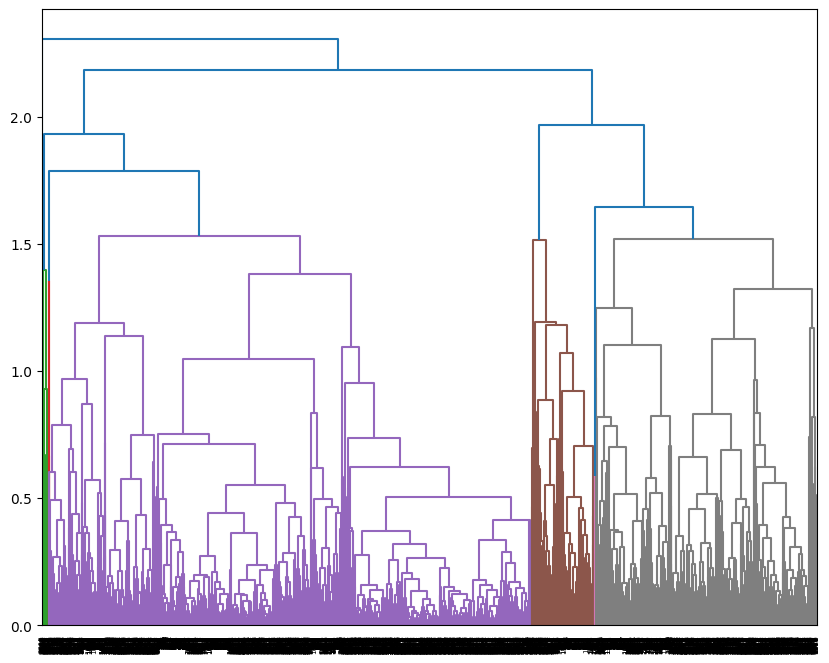

In [436]:
plt.figure(figsize=(10, 8))
dendrogram_complete = sch.dendrogram(sch.linkage(df2,method='complete'))

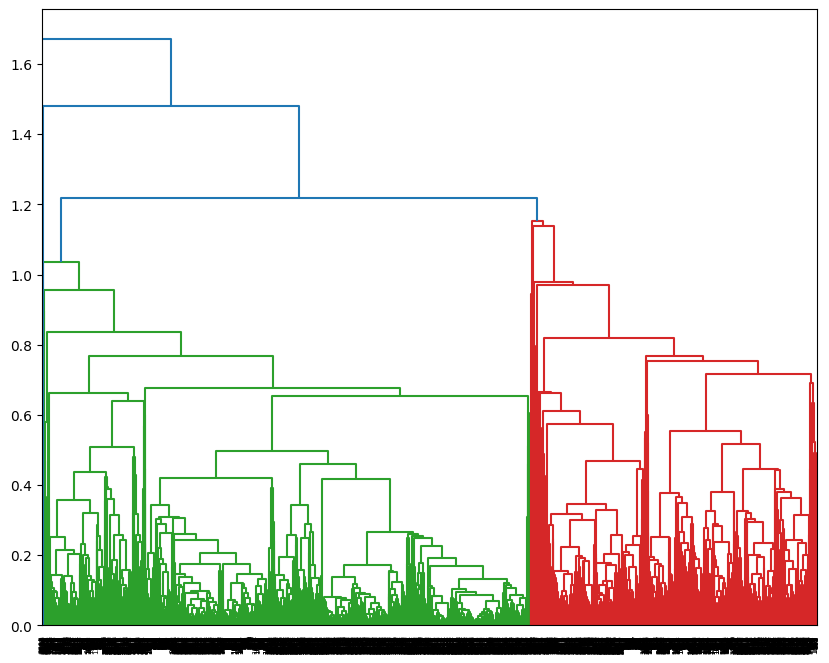

In [437]:
plt.figure(figsize=(10, 8))
dendrogram_average = sch.dendrogram(sch.linkage(df2,method='average'))

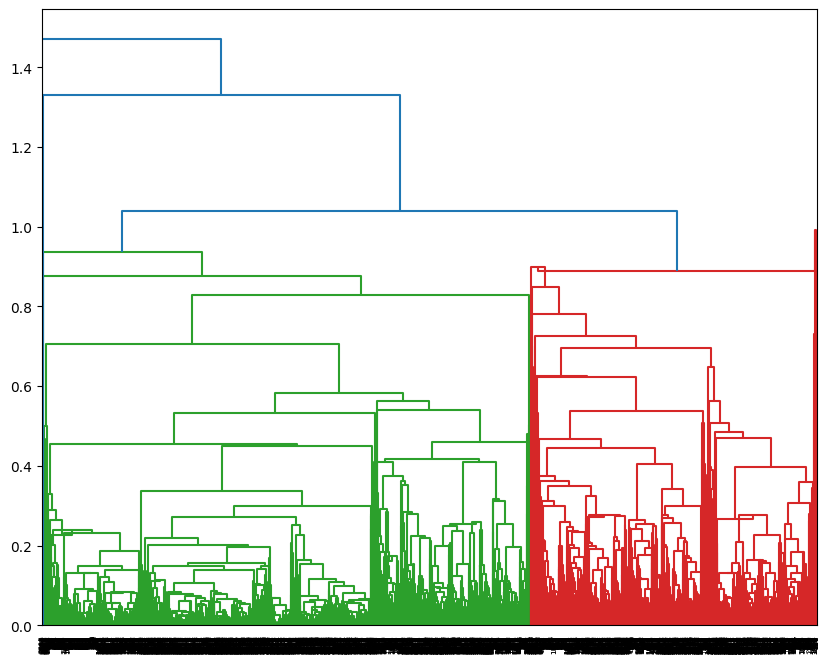

In [438]:
plt.figure(figsize=(10, 8))
dendrogram_centroid = sch.dendrogram(sch.linkage(df2,method='centroid'))

In [439]:
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean',linkage='single')

In [440]:
y_hc = hc.fit_predict(df1_norm)
clusters = pd.DataFrame(y_hc,columns = ['Cluster_No'])

In [441]:
y_hc

array([1, 1, 1, ..., 0, 1, 1])

In [442]:
clusters

,Cluster_No
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [443]:
df_with_all_clusters = df.copy()

In [444]:
df_with_all_clusters['Cluster_id_HC'] = clusters

In [445]:
df_with_all_clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id_HC
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


# **K-Means**

In [447]:
from sklearn.cluster import KMeans


In [448]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [449]:
#Elbor Graph for Finding best cluster
wcss = []

In [450]:
for i in range (1,15):
  kmeans = KMeans(n_clusters = i,init='k-means++',max_iter=300,random_state = 0)
  kmeans.fit(df2)
  wcss.append(kmeans.inertia_)



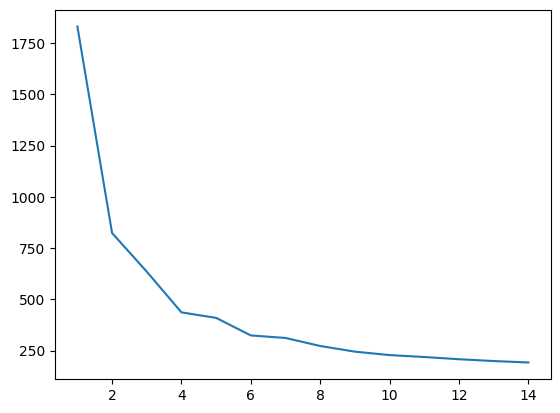

In [451]:
plt.plot(range(1,15),wcss)

In [452]:
wcss

[1830.793212858416,
 823.6756984125228,
 635.2160678747765,
 436.70885761932647,
 409.84198454709735,
 324.262560291016,
 311.9630560372351,
 272.8276114425408,
 245.24277703138262,
 228.48943200048876,
 219.05944357529646,
 208.24672886626638,
 199.4067581121733,
 192.40160151165387]

In [492]:
kmeans = KMeans(n_clusters=4 ,random_state=0)
predict = kmeans.fit_predict(df2)

In [454]:
predict

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [493]:
from sklearn.metrics import silhouette_score
silhouette_score(df2,predict)


np.float64(0.47483765255961)

In [455]:
df_with_all_clusters['Cluster_id_KMean'] = predict

In [494]:
df_with_all_clusters['Cluster_id_HC'].value_counts()

,count
Cluster_id_HC,
1,2518
0,1481


In [457]:
df_with_all_clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id_HC,Cluster_id_KMean
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,1


# **DBScan**

In [458]:
from sklearn.cluster import DBSCAN

In [459]:
db = DBSCAN(eps = 0.5,min_samples=3)
y=db.fit_predict(df2)
y

array([0, 0, 0, ..., 1, 0, 0])

In [460]:
from sklearn.metrics import silhouette_score

In [461]:
silhouette_score(df2,y)

np.float64(0.24276126792002842)

In [462]:
from sklearn.neighbors import NearestNeighbors

In [463]:
neighbor = NearestNeighbors(n_neighbors=3).fit(df2)

In [464]:
d,index = neighbor.kneighbors(df2)

In [465]:
neighbor.kneighbors(df2)

(array([[0.        , 0.00871531, 0.00982329],
        [0.        , 0.01212297, 0.01331785],
        [0.        , 0.01857767, 0.01872551],
        ...,
        [0.        , 0.02591961, 0.04945468],
        [0.        , 0.0264501 , 0.02784951],
        [0.        , 0.00038605, 0.0027753 ]]),
 array([[   0,  363,    3],
        [   1,    3,    0],
        [   2,  338,  344],
        ...,
        [3996, 3877, 3830],
        [3997, 3970, 3968],
        [3998, 3491, 3455]]))

In [466]:
d

array([[0.        , 0.00871531, 0.00982329],
       [0.        , 0.01212297, 0.01331785],
       [0.        , 0.01857767, 0.01872551],
       ...,
       [0.        , 0.02591961, 0.04945468],
       [0.        , 0.0264501 , 0.02784951],
       [0.        , 0.00038605, 0.0027753 ]])

In [467]:
index

array([[   0,  363,    3],
       [   1,    3,    0],
       [   2,  338,  344],
       ...,
       [3996, 3877, 3830],
       [3997, 3970, 3968],
       [3998, 3491, 3455]])

In [468]:
distance = np.sort(d[:,1])

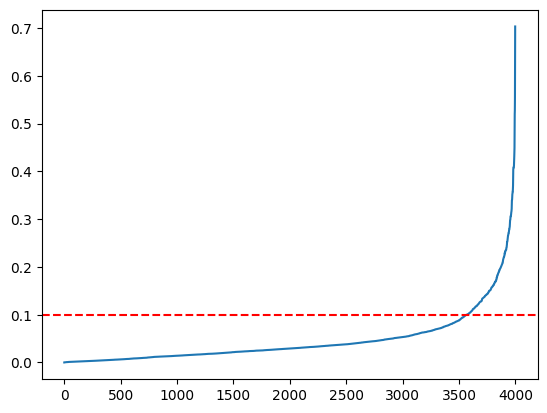

In [469]:
plt.plot(distance)
plt.axhline(y=0.1,linestyle = '--', color ='red')

Model Evaluation

In [470]:
db= DBSCAN(eps=1,min_samples = 23)
yp = db.fit_predict(df2)
silhouette_score(df2,yp)

np.float64(0.535930510919477)

In [471]:
df_with_all_clusters['Cluster_id_DBScan'] = yp

In [472]:
df_with_all_clusters['Cluster_id_DBScan'].value_counts()

,count
Cluster_id_DBScan,
0,2518
1,1481


<ipython-input-474-ac3b320dd3c2>:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_axis[df_with_all_clusters['Cluster_id_DBScan'] == label],


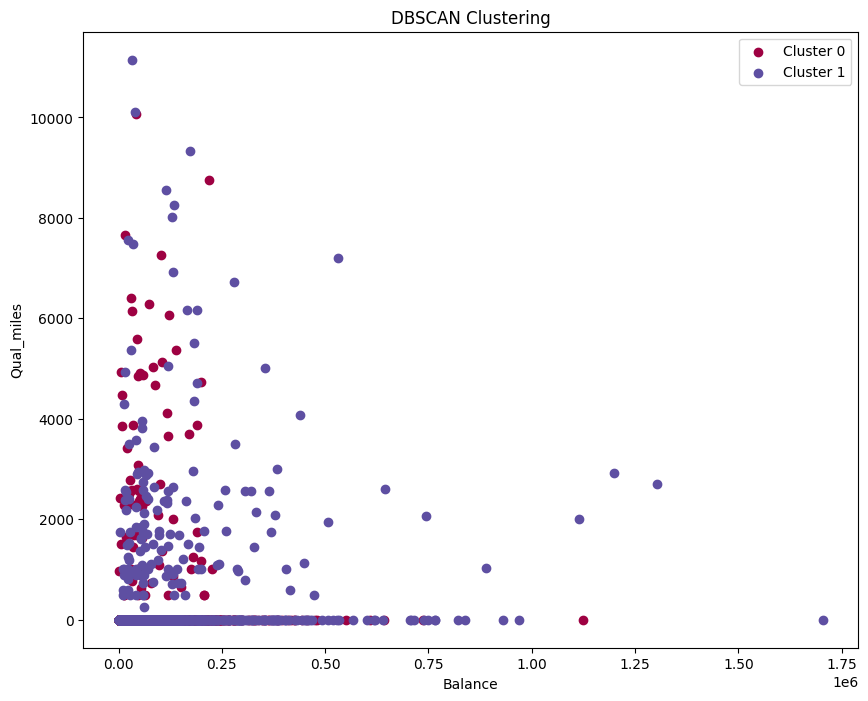

In [474]:
x_axis = df_with_all_clusters['Balance']
y_axis = df_with_all_clusters['Qual_miles']
plt.figure(figsize=(10, 8))

for label in set(yp):
    if label == -1:  # Points classified as noise
        color = 'black'
        marker = 'x'  # Use a different marker for noise points
    else:
        color = plt.cm.Spectral(label / (len(set(yp)) - 1))
        marker = 'o'

    plt.scatter(x_axis[df_with_all_clusters['Cluster_id_DBScan'] == label],
                y_axis[df_with_all_clusters['Cluster_id_DBScan'] == label],
                c=color, label=f'Cluster {label}', marker=marker)

plt.xlabel('Balance')
plt.ylabel('Qual_miles')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


In [473]:
df_with_all_clusters

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster_id_HC,Cluster_id_KMean,Cluster_id_DBScan
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,1,0
